<a href="https://colab.research.google.com/github/TashiNyangmi/Understood/blob/colab/Understood_org2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.  Empirical = Based on observation or experience, rather than theory or pure logic
2.   Cross-sectional = data from a specific point in time

1.   The Sensitivity of an Empirical Model of **Married Women's** Hours of Work to Economic and Statistical Assumptions
2.   List item





If the wife is not in the labor force, what does her wage signify? 

08/06/2020
Thursday
Understood Take Home

# Importing Libraries and Dataset

In [140]:
# Importing libraries
import pandas as pd #used
import numpy as np 
import matplotlib.pyplot as plt # visualization

%matplotlib inline 
# |^| causes the plots to appear inline and remain in the document
import seaborn as sns # visualization

from scipy import stats # for t-test

In [141]:
# Importing dataset from Github
url = 'https://raw.githubusercontent.com/TashiNyangmi/Understood/master/Mroz.csv' #uploaded the dataset to my ["TashiNyangmi's"] personal Github
df_org = pd.read_csv(url)
df_org.head() # to check if the import worked

,Unnamed: 0,work,hoursw,child6,child618,agew,educw,hearnw,wagew,hoursh,ageh,educh,wageh,income,educwm,educwf,unemprate,city,experience
0,1,no,1610,1,0,32,12,3.3540,2.65,2708,34,12,4.0288,16310,12,7,5.0,no,14
1,2,no,1656,0,2,30,12,1.3889,2.65,2310,30,9,8.4416,21800,7,7,11.0,yes,5
2,3,no,1980,1,3,35,12,4.5455,4.04,3072,40,12,3.5807,21040,12,7,5.0,no,15
3,4,no,456,0,3,34,12,1.0965,3.25,1920,53,10,3.5417,7300,7,7,5.0,no,6
4,5,no,1568,1,2,31,14,4.5918,3.60,2000,32,12,10.0000,27300,12,14,9.5,yes,7


In [142]:
# Data Dictionary

# URL to data dictionaries:
# Dr. Ronen provided: https://www.rdocumentation.org/packages/npsf/versions/0.4.2/topics/mroz !!! variable names(documentation vs dataset provided) did not match, although they were somewhat similar
# I used : https://rdrr.io/rforge/Ecdat/man/Mroz.html  << because the variable names provided in this data dictionary matched the variables names in the dataset

# Defining the data dictionary
data_dict = { 'work'    : 'if in labor force in 1975', # exception: here used value of the key "inlf" from link Dr. Ronen provided (original value = Work at home in 1975?)
              'hoursw'  : 'wife\'s hours of work in 1975',
              'child6'  : '# of childredn below 6',
              'child618': '# of childredn between 6 and 18',
              'agew'    : 'wife\'s age',
              'educw'   : 'wife\'s educaitonal attainment in years',
              'hearnw'  : 'wife\'s average hourly earnings, in 1975 $',
              'wagew'   : 'wife\'s wage reported at the time of the 1976 interview',
              'hoursh'  : 'husband\'s hours worked in 1975',
              'ageh'    : 'husband\'s age',
              'educh'   : 'husband\'s educational attainment, in years',
              'wageh'   : 'husband\'s wage, in 1975 dollars',
              'income'  : 'family income, in 1975 dollars',
              'educwm'  : 'wife\'s mother\'s educational attainment, in years',
              'educwf'  : 'wife\'s father\'s educational attainment, in years',
              'unemprate': 'unemployment rate in country of residence, in percentage points',
              'city'    : 'lives in large city (SMSA)?',
              'experience' : 'actual years of wife\'s previous labor market experience'}

In [143]:
# List of attributes provided in the instructions
col_list = ['work','child6','child618','agew','educw','ageh','educh','educwm', 'educwf','unemprate','city']

In [144]:
# Limiting/Slicing the dataset to provided attributes (as instructed)
df = df_org[col_list].copy()

In [145]:
# Check if df is copied correctly
df.head()

,work,child6,child618,agew,educw,ageh,educh,educwm,educwf,unemprate,city
0,no,1,0,32,12,34,12,12,7,5.0,no
1,no,0,2,30,12,30,9,7,7,11.0,yes
2,no,1,3,35,12,40,12,12,7,5.0,no
3,no,0,3,34,12,53,10,7,7,5.0,no
4,no,1,2,31,14,32,12,12,14,9.5,yes


# User Defined Functions

In [193]:
# function to divide a dataframe into 2 slices according to a cutoff on a column
def col_split_cutoff (df, column, cutoff):
  equal_more = df[df[column] >= cutoff].copy() # atleast cutoff 
  less = df[df[column] < cutoff].copy() # less than cutoff 
  return(equal_more, less)

In [196]:
# function to divide a dataframe into 2 slice according to a boolean column
def col_split_bool (df, column, n, y):
  negative = df[df[column] == n].copy()
  positive = df[df[column] == y].copy()
  return(negative, positive)

In [ ]:
# function to replace string boolean columns with 1/0
def to_binary (df, col, y, n):
  df[col] = df[col].replace(n,0)
  df[col] = df[col].replace(y,1)

# EDA

### Preliminary EDA

In [146]:
df.head()

,work,child6,child618,agew,educw,ageh,educh,educwm,educwf,unemprate,city
0,no,1,0,32,12,34,12,12,7,5.0,no
1,no,0,2,30,12,30,9,7,7,11.0,yes
2,no,1,3,35,12,40,12,12,7,5.0,no
3,no,0,3,34,12,53,10,7,7,5.0,no
4,no,1,2,31,14,32,12,12,14,9.5,yes


In [147]:
df.tail()

,work,child6,child618,agew,educw,ageh,educh,educwm,educwf,unemprate,city
748,yes,0,2,40,13,43,16,10,10,9.5,yes
749,yes,2,3,31,12,33,12,12,12,7.5,no
750,yes,0,0,43,12,43,12,10,3,7.5,no
751,yes,0,0,60,12,55,8,12,12,14.0,yes
752,yes,0,3,39,9,48,12,7,7,11.0,yes


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   work       753 non-null    object 
 1   child6     753 non-null    int64  
 2   child618   753 non-null    int64  
 3   agew       753 non-null    int64  
 4   educw      753 non-null    int64  
 5   ageh       753 non-null    int64  
 6   educh      753 non-null    int64  
 7   educwm     753 non-null    int64  
 8   educwf     753 non-null    int64  
 9   unemprate  753 non-null    float64
 10  city       753 non-null    object 
dtypes: float64(1), int64(8), object(2)
memory usage: 64.8+ KB


In [149]:
# Lets check the number of unique values in each column
for col in list(df): # here it works the same as: for col in df.columns.tolist()
    print(col)
    print(np.sort(df[col].unique()))
    print("# of unique variables: ", np.count_nonzero(df[col].unique()))

work
['no' 'yes']
# of unique variables:  2
child6
[0 1 2 3]
# of unique variables:  3
child618
[0 1 2 3 4 5 6 7 8]
# of unique variables:  8
agew
[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60]
# of unique variables:  31
educw
[ 5  6  7  8  9 10 11 12 13 14 15 16 17]
# of unique variables:  13
ageh
[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60]
# of unique variables:  31
educh
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
# of unique variables:  15
educwm
[ 0  3  7  9 10 12 14 16 17]
# of unique variables:  8
educwf
[ 0  3  7  9 10 12 14 16 17]
# of unique variables:  8
unemprate
[ 3.   5.   7.5  9.   9.5 11.  14. ]
# of unique variables:  7
city
['no' 'yes']
# of unique variables:  2


In [150]:
df.describe() # Common summary statistics of values in each column, except boolean (technically object) columns ("work" and "city")

,child6,child618,agew,educw,ageh,educh,educwm,educwf,unemprate
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000
mean,0.237716,1.353254,42.537849,12.286853,45.120850,12.491368,9.250996,8.808765,8.623506
std,0.523959,1.319874,8.072574,2.280246,8.058793,3.020804,3.367468,3.572290,3.114934
min,0.000000,0.000000,30.000000,5.000000,30.000000,3.000000,0.000000,0.000000,3.000000
25%,0.000000,0.000000,36.000000,12.000000,38.000000,11.000000,7.000000,7.000000,7.500000
50%,0.000000,1.000000,43.000000,12.000000,46.000000,12.000000,10.000000,7.000000,7.500000
75%,0.000000,2.000000,49.000000,13.000000,52.000000,15.000000,12.000000,12.000000,11.000000
max,3.000000,8.000000,60.000000,17.000000,60.000000,17.000000,17.000000,17.000000,14.000000


Some observations:


1.   child6 - Most (>75%) wife does not have a child below age6 (child6 = 0)
2.   educw  - Most (>75%) of wives has educw >= 12 
1.   educh  - Most (>75%) of husbands have educh >= 11. At least half (>=50%)  of husbands have educh >= 12. 

We see a similar patter in edcuacational attainment for the mother and father of the wives.



1.  educw  - Most (>75%) of wives mother has educwm >= 7 
1.  educh  - Most (>75%) of wives father has educwf >= 7

Also notice that the columns (agew and ageh) have relatively high values and high standard deviation.







In [151]:
# for 2 remaining columns
df.describe(include=['object'])

,work,city
count,753,753
unique,2,2
top,no,yes
freq,428,484


In [163]:
yes_city

no     0.357238
yes    0.642762
Name: city, dtype: float64

In [167]:
yes_work = df['work'].value_counts(normalize = True).sort_index()
yes_city = df['city'].value_counts(normalize = True).sort_index()

print("wives working: ", (yes_work[1]*100).round(2), "%")
print("wives living in city: ", (yes_city[1]*100).round(2), "%")

wives working:  43.16 %
wives living in city:  64.28 %


In [168]:
# Checking duplicate Rows and columns
df[df.duplicated()]

,work,child6,child618,agew,educw,ageh,educh,educwm,educwf,unemprate,city


Data Cleaning Summary:

1.   Missing Values: None
2.   Duplicate Values: None
1.   Column Types: No change. NOte: city, and work should arguably be converted to boolean. I did not because it brought about complications in EDA and visualization later on




### Histogram of all variables

In [169]:
print (len(df.columns))
print (df.dtypes)

11
work          object
child6         int64
child618       int64
agew           int64
educw          int64
ageh           int64
educh          int64
educwm         int64
educwf         int64
unemprate    float64
city          object
dtype: object




1. no of columns = 11.
2. We have 2 boolean columns at position 0 and -1.
3. no of columns to be ploted = (11 total - 2 boolean) 9.
4. Let us start the index at 1 (instead of 0) and end at -2.




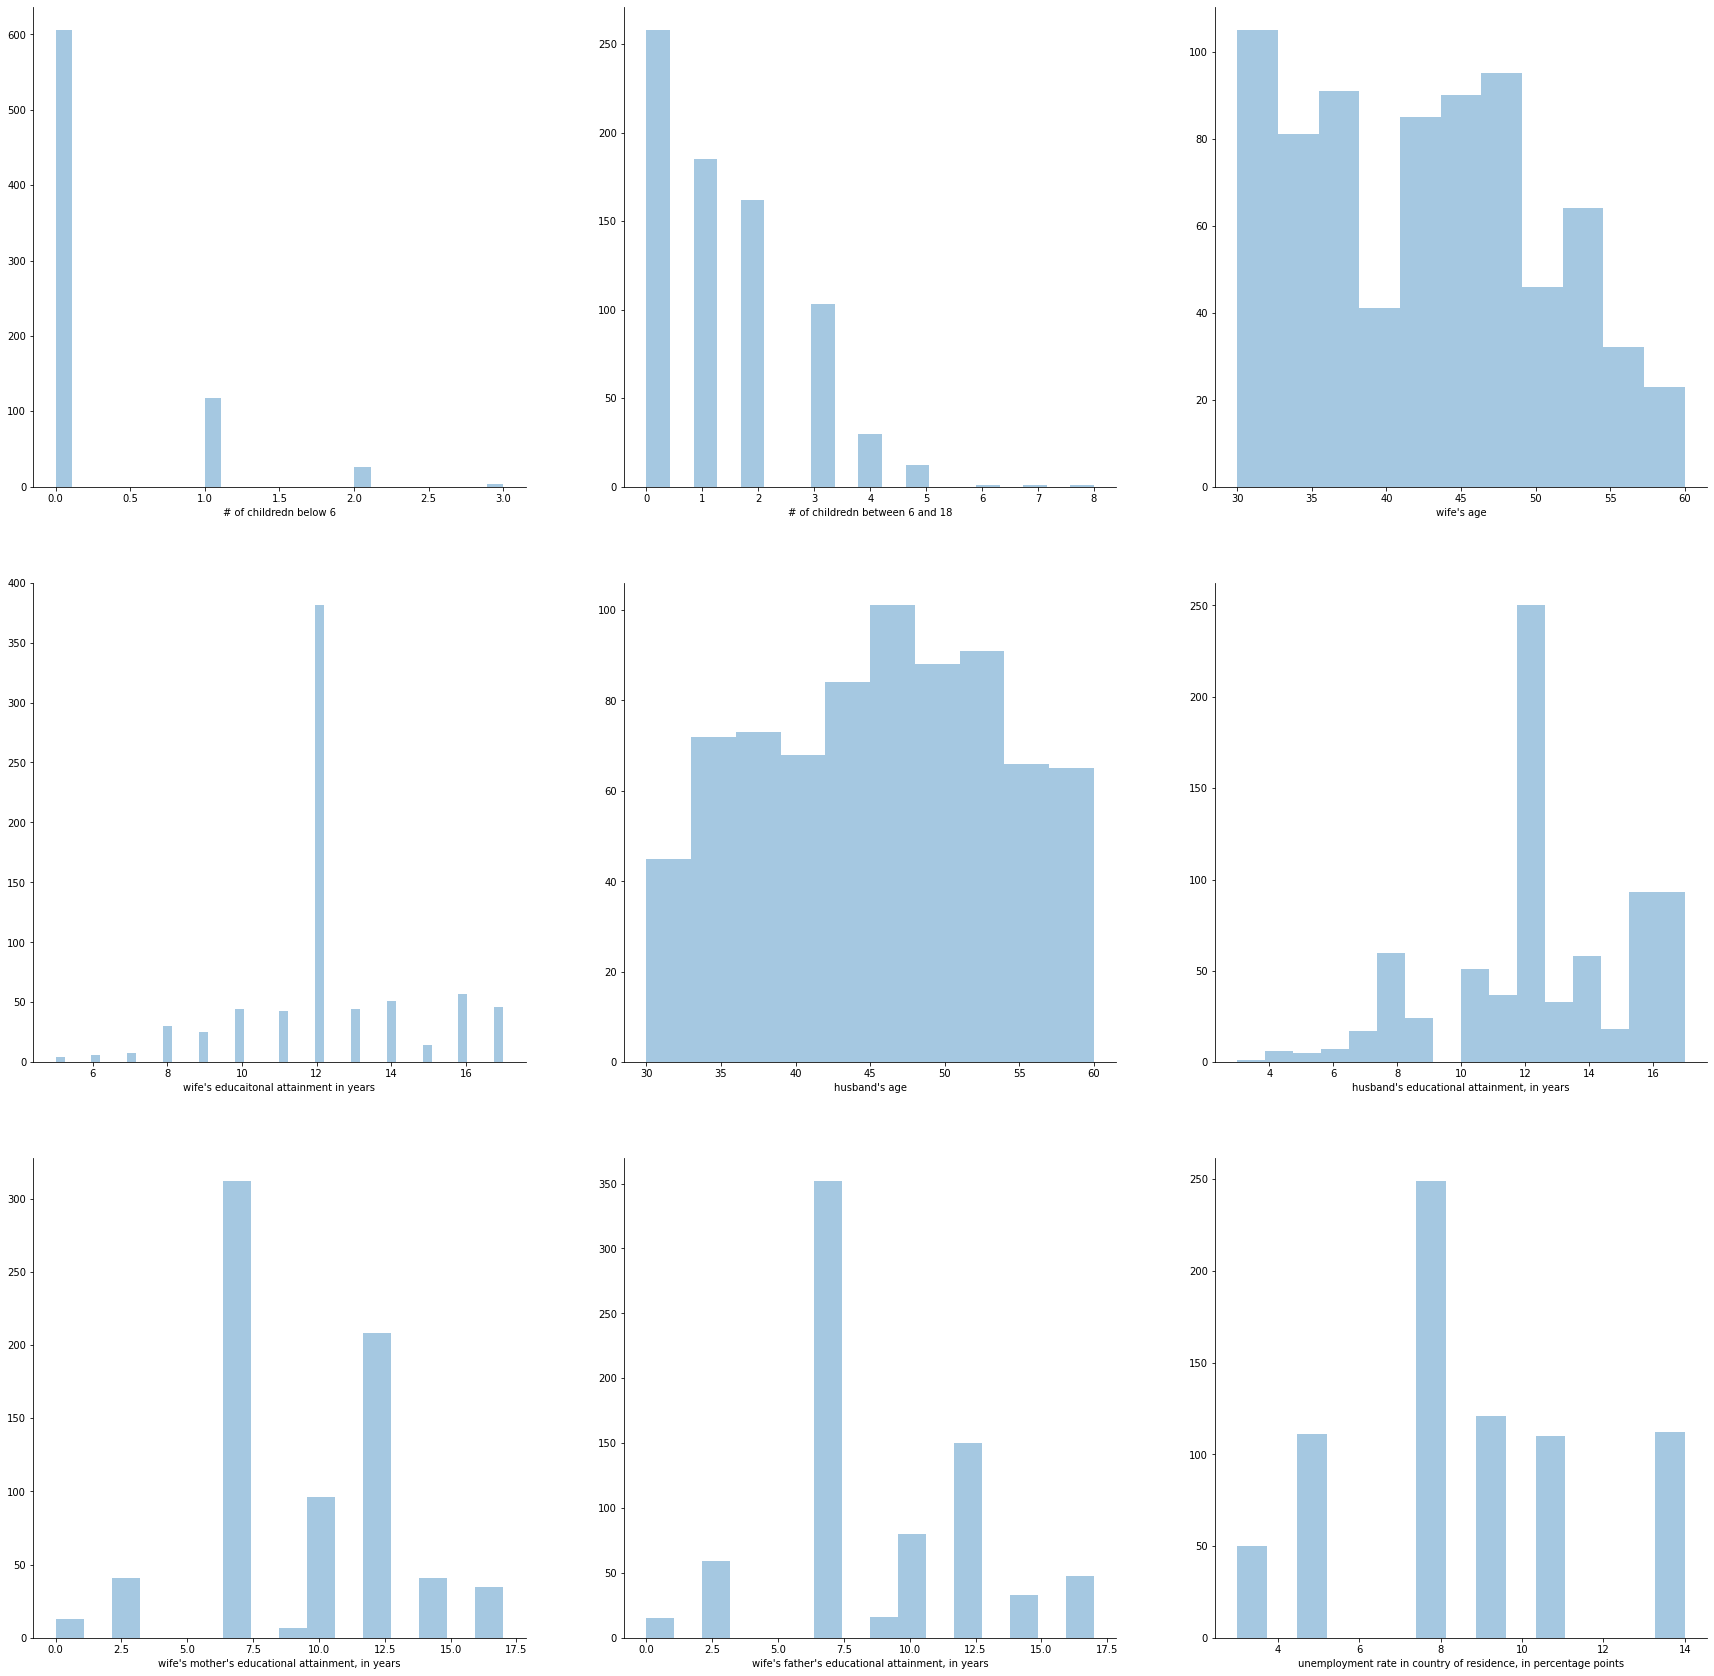

In [170]:
# Set up the matplotlib figure
# This portion of the code should be ideally refactored to facilitate reproducability
subplot_col = 3 # no of cols
subplot_row = 3 # no of rows
f, axes = plt.subplots (subplot_row, subplot_col, figsize = (30,30) )
sns.despine() #removing the top and left borders of each subplot

#Plotting
col_no = 1 #starting index at 1 (instead of 0) to avoid the first column (i.e work (boolean))
for i in range(subplot_row):
  for j in range(subplot_col):
    # Note: df.iloc[:,col_no] calls a single column
    # Note: data_dict[df.columns[col_no]] first returns the name/label of a column as an argument to data_dict 
    sns.distplot(df.iloc[:,col_no], ax = axes [i,j],kde = False, axlabel=data_dict[df.columns[col_no]] ) 
    col_no += 1

Observations: Most of the wives and husbands have 12 years of educational attainment (High School?)
Where as for the wives' parents, they have 7.5 years of educational attainment (Middle school?).
We learned something about this earlier from the describe() function




Still have to plot 2 histograms for column:work and column:city. These are categorical (more correctly, boolean) variables for the purposes of plotting

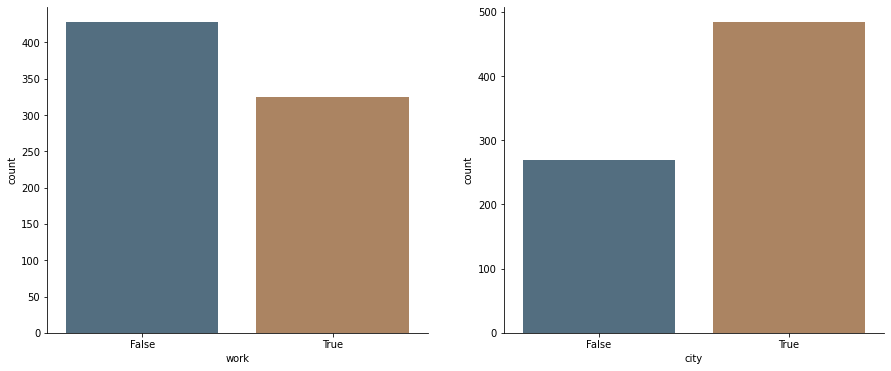

In [93]:
# Set up the matplotlib figure
subplot_col = 2 # no of cols
subplot_row = 1 # no of rows
f, axes = plt.subplots (subplot_row, subplot_col, figsize = (15,6))
sns.despine() #removing the top and left borders of each subplot

# Countplot: A histogram across a categorical variable, instead of quantitative variable.
sns.countplot(df["work"], ax = axes[0], saturation = 0.3)
sns.countplot(df["city"], ax = axes[1], saturation = 0.3)

Let us continue with some more EDA

### Box plots, Pairplots & Heatmap

In [183]:
# Create a copy of the Dataframe:df so that we can "melt" it for convinence in visualization
df_temp = df.copy()
df_temp.head()

,work,child6,child618,agew,educw,ageh,educh,educwm,educwf,unemprate,city
0,no,1,0,32,12,34,12,12,7,5.0,no
1,no,0,2,30,12,30,9,7,7,11.0,yes
2,no,1,3,35,12,40,12,12,7,5.0,no
3,no,0,3,34,12,53,10,7,7,5.0,no
4,no,1,2,31,14,32,12,12,14,9.5,yes


In [174]:
df_temp.columns[0:-1]

Index(['work', 'child6', 'child618', 'agew', 'educw', 'ageh', 'educh',
       'educwm', 'educwf', 'unemprate'],
      dtype='object')

In [185]:
# !! do not run multiple times !!

# Melting df_temp
# copy pasted from output above, find a better way
df_temp = pd.melt(df_temp, id_vars=['work'], value_vars=[                                           
 'child6',
 'child618',
 'agew',
 'educw',
 'ageh',
 'educh',
 'educwm',
 'educwf',
 'unemprate',])

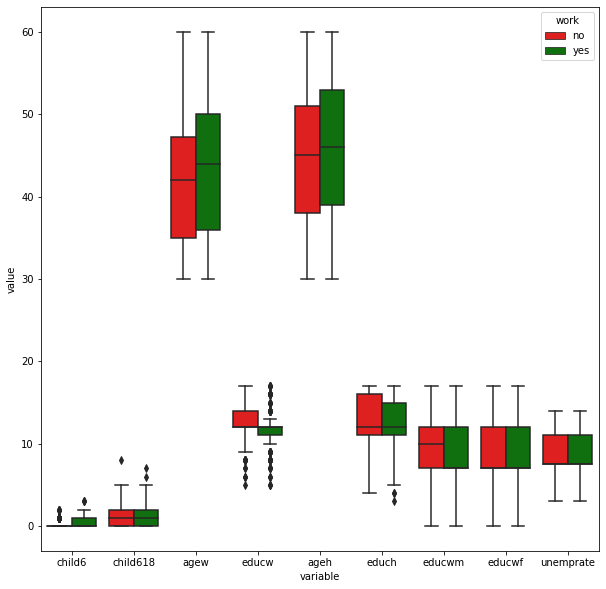

In [186]:
# A box plot 

plt.figure(figsize=(10,10))
sns.boxplot(x="variable", y="value", hue = 'work',data=df_temp, palette= {'no':'red', 'yes':'green'})

In [ ]:
# Let us "zoom in" on the figure without the age variables
df_temp1 = df_temp[(df_temp['variable'] != 'agew') & (df_temp['variable'] != 'ageh')].copy() # a copy of the DataFrame:df_temp w/o the column:agew and column:ageh 

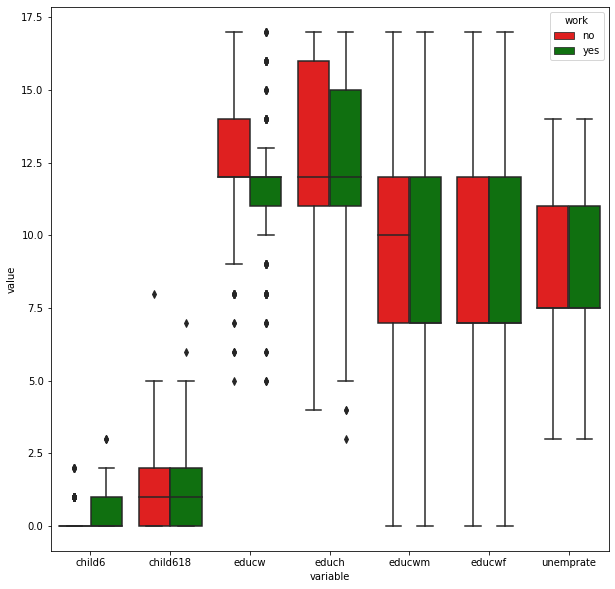

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x="variable", y="value", hue = 'work', data=df_temp1, palette= {'no':'red', 'yes':'green'})

Observation: For wifes(observations) with work = yes, the educational attainment seems to be significanlty lower

Let us explore the relationship between the various variables

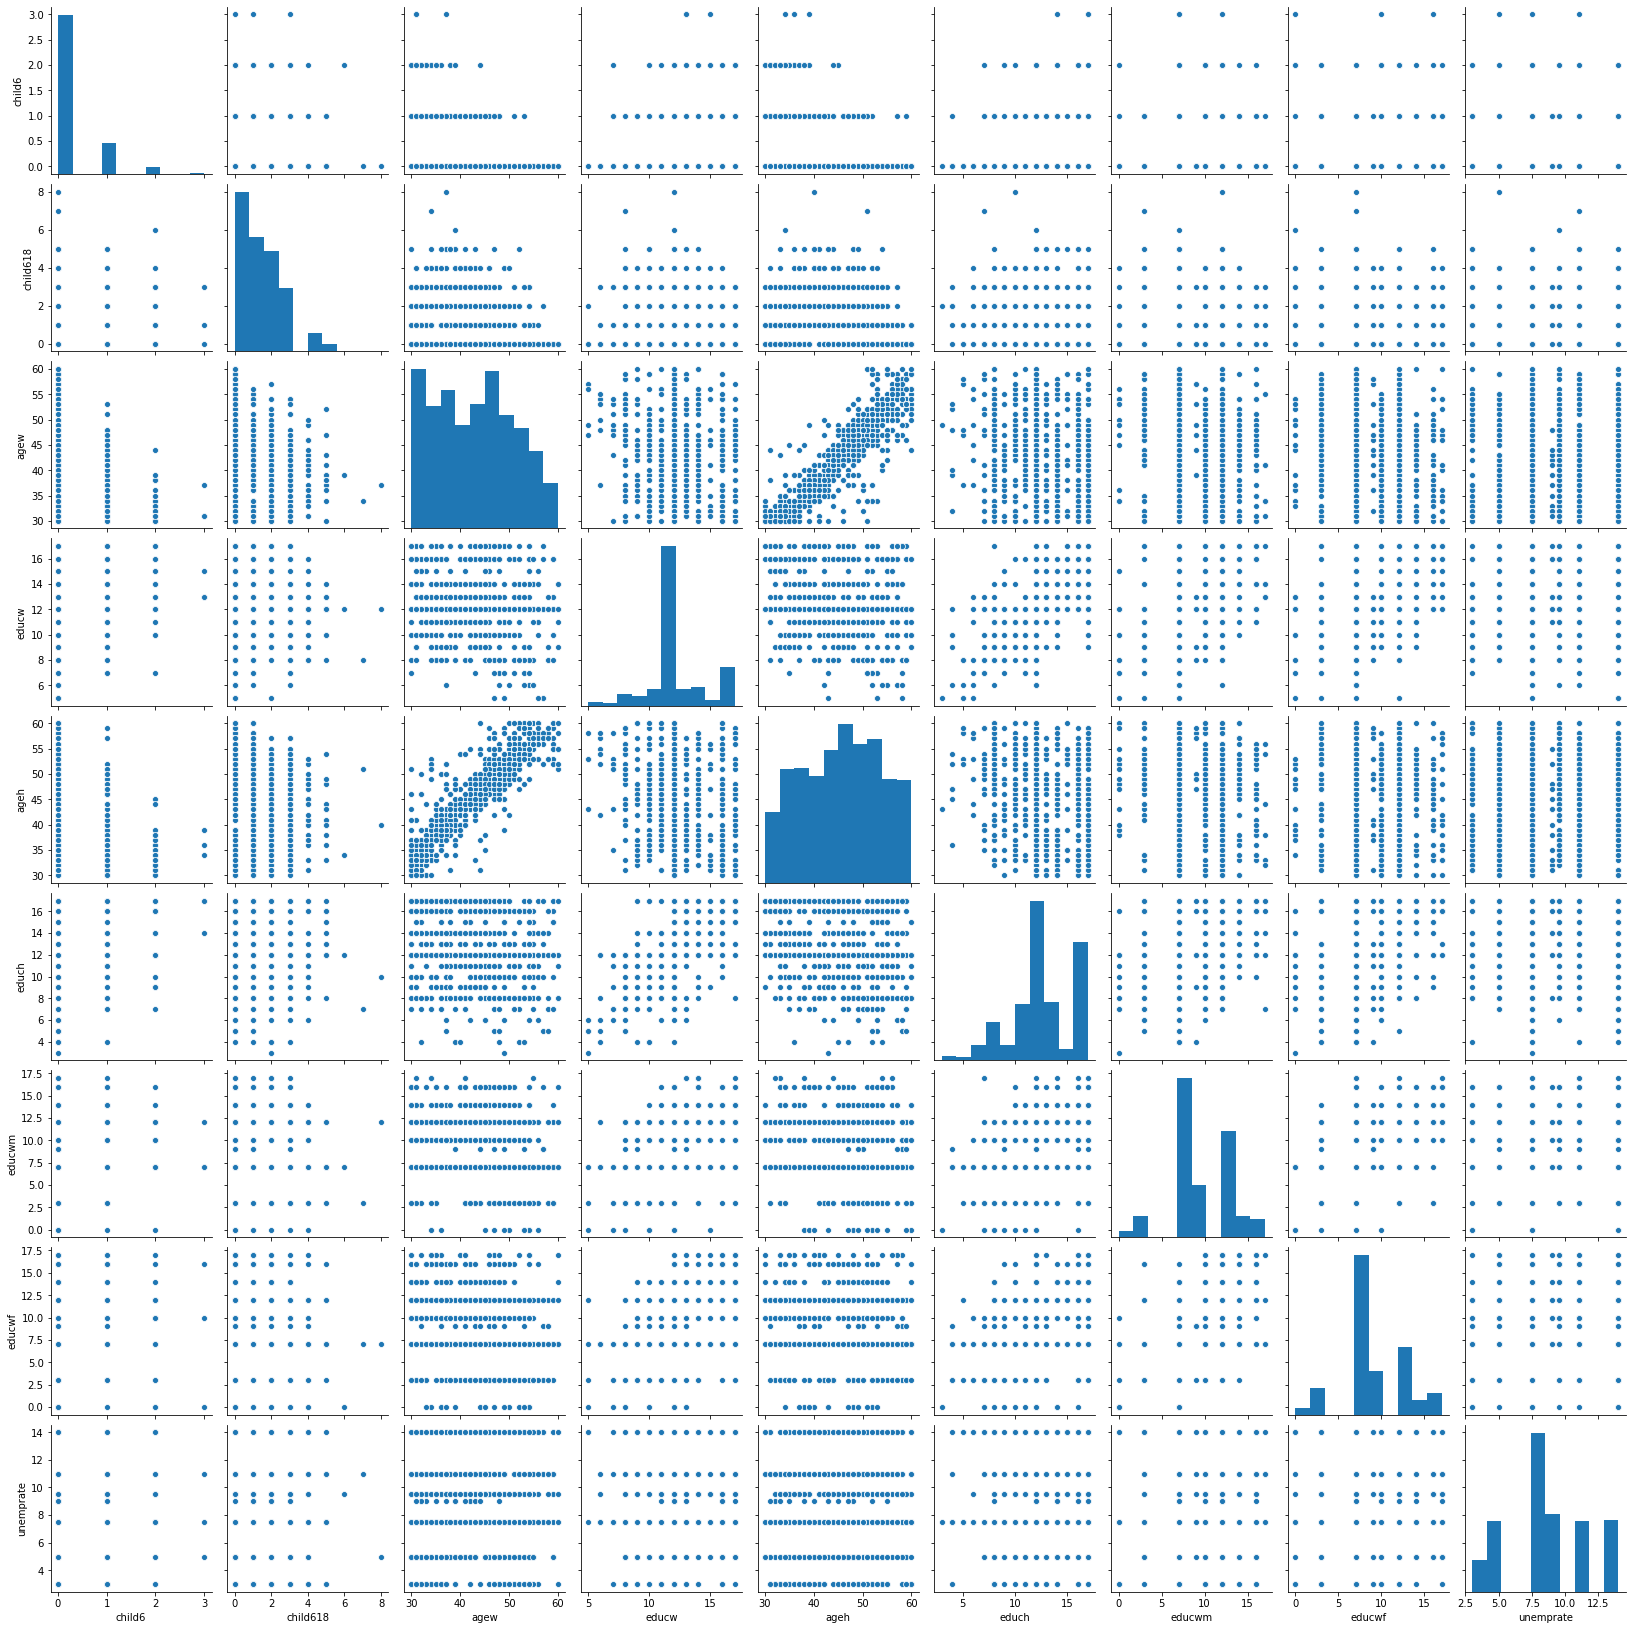

In [187]:
sns.pairplot(df)

Observations:

1.   agew and ageh highly and positively corelated
2.   eduw and eduh are also positively corelated but corelation is weak
3.   the values for educw is highly concentrated towards the mean, followed closely by educh






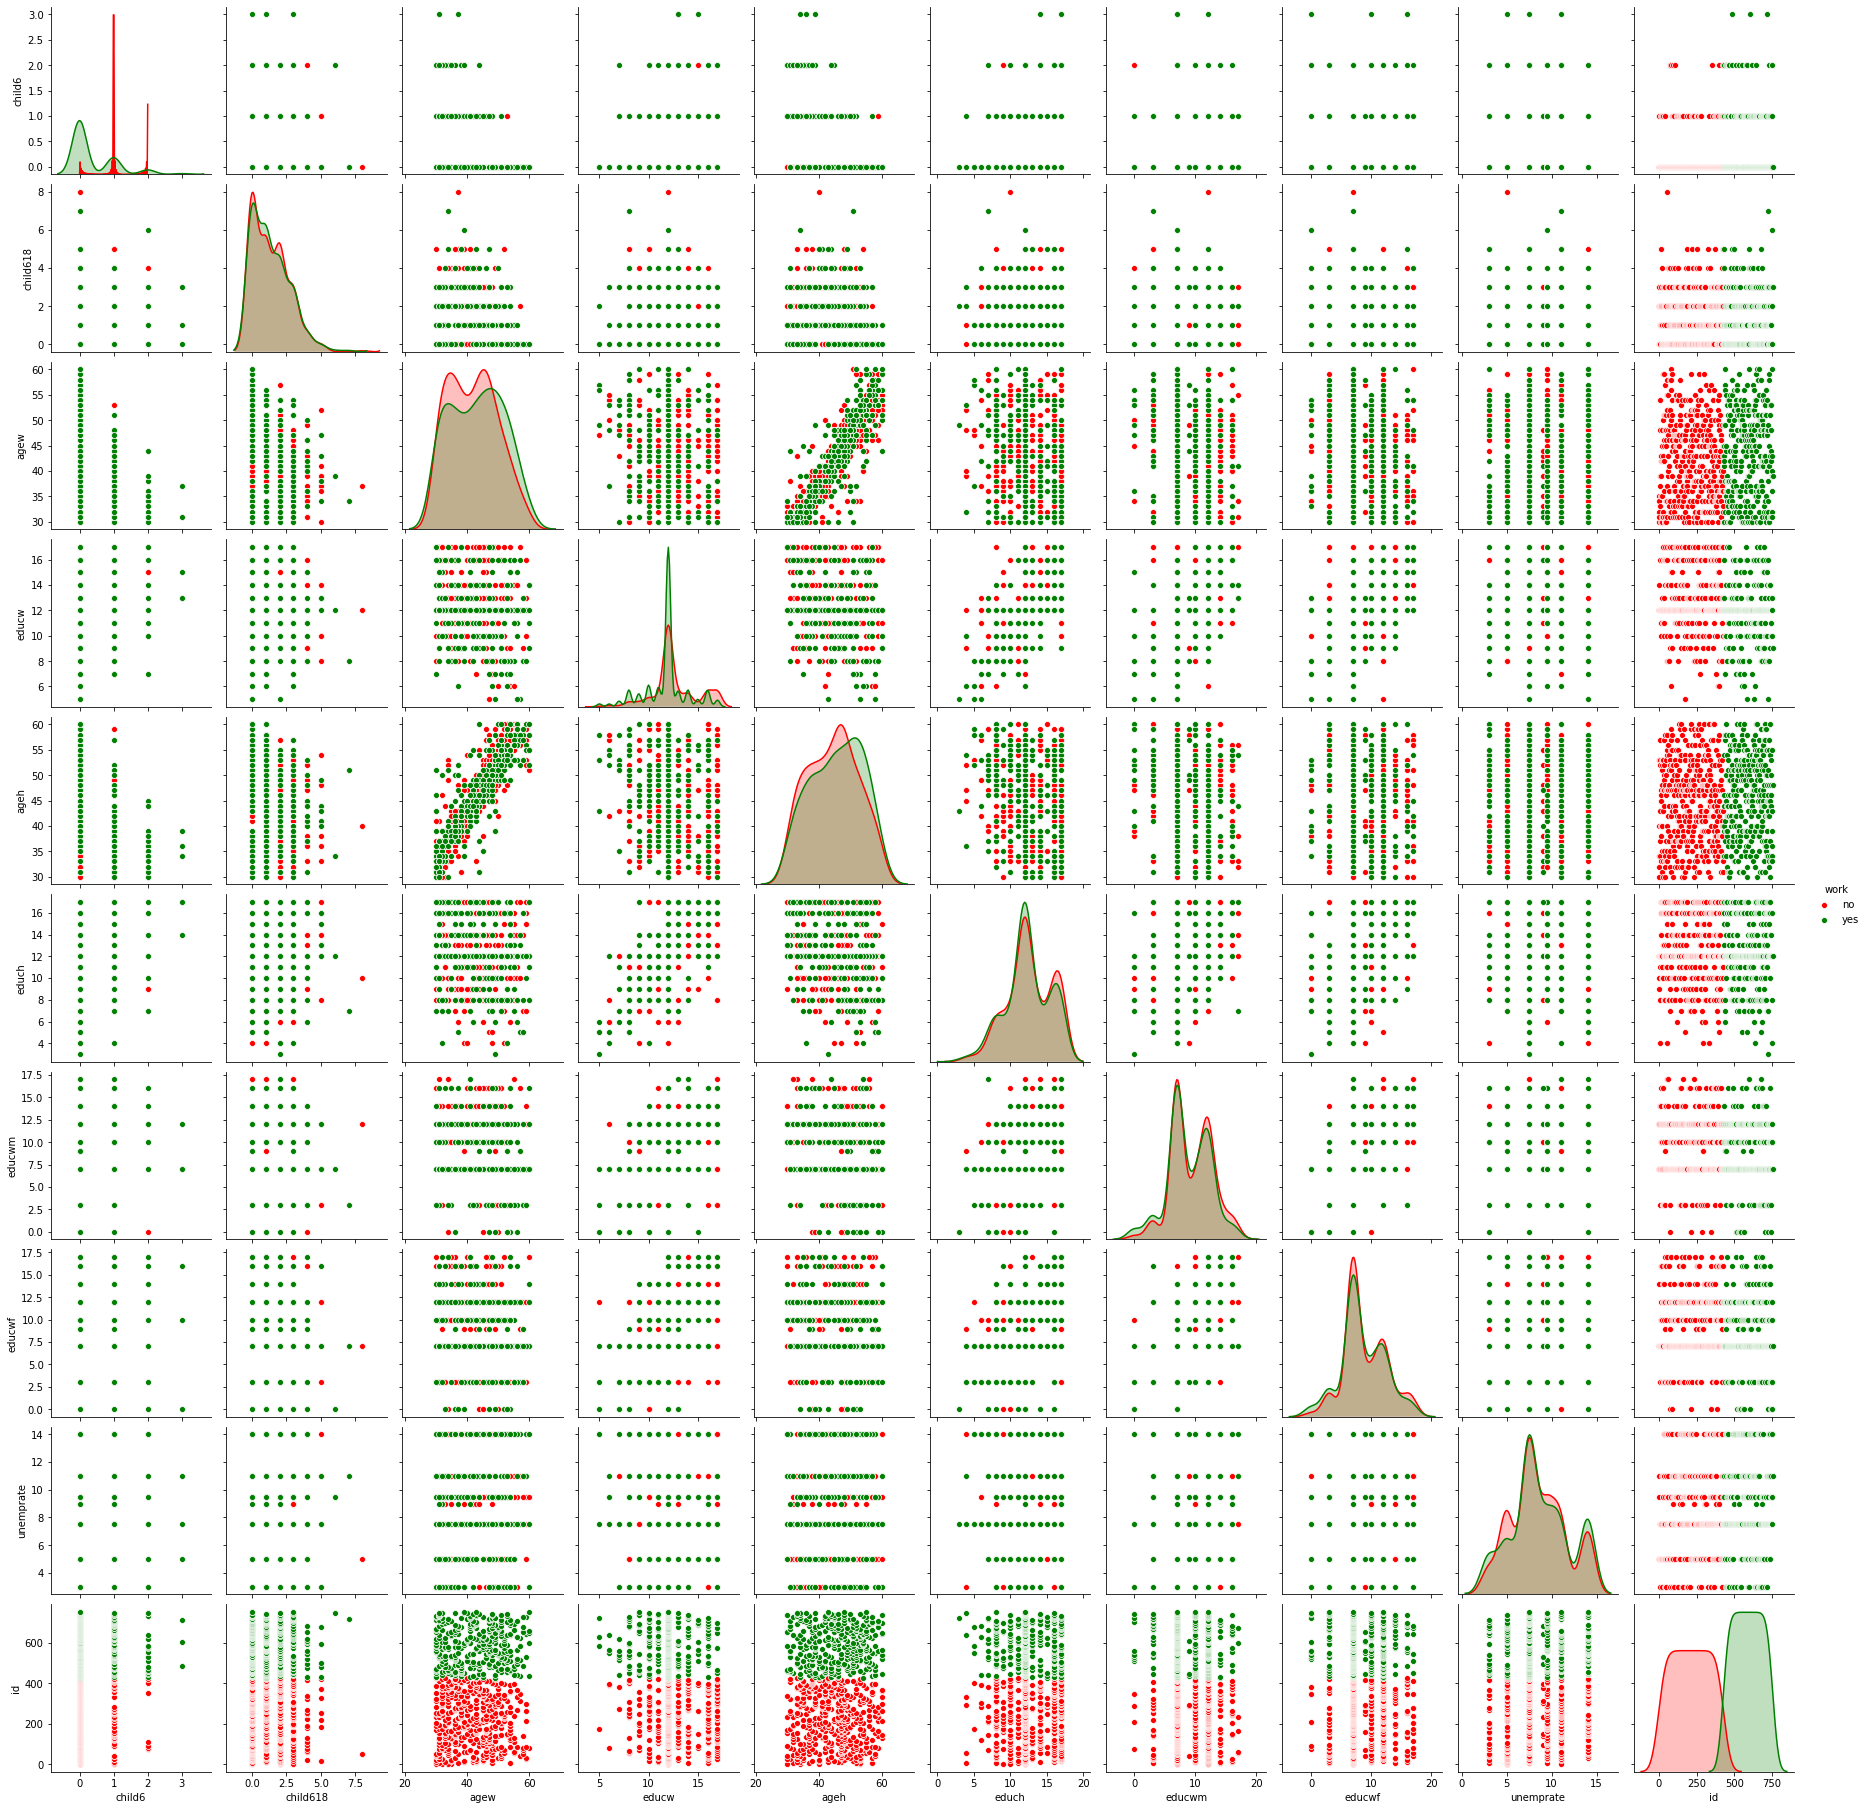

In [ ]:
sns.pairplot(data = df, hue = 'work', palette={'yes' : 'green', 'no':'red'})

Observations:

1.   agew and ageh highly and positively corelated; corelation is stronger for wives that have work
2.   eduw and eduh are also positively corelated but corelation is weak; corelation is stronger for wives that have work
3.   the values for educw is highly concentrated towards the mean, followed closely by educh; concentration is higher for both educw and educh for wives that have work (observed earlier with describe() and individual histograms)






In [188]:
df.groupby(['work']).agg(np.mean)

,child6,child618,agew,educw,ageh,educh,educwm,educwf,unemprate
work,,,,,,,,,
no,0.140187,1.350467,41.971963,12.658879,44.609813,12.612150,9.516355,8.988318,8.545561
yes,0.366154,1.356923,43.283077,11.796923,45.793846,12.332308,8.901538,8.572308,8.726154


Observation: The subgroup with work = yes, have (on average) more children under the age of 6

### Heat Map

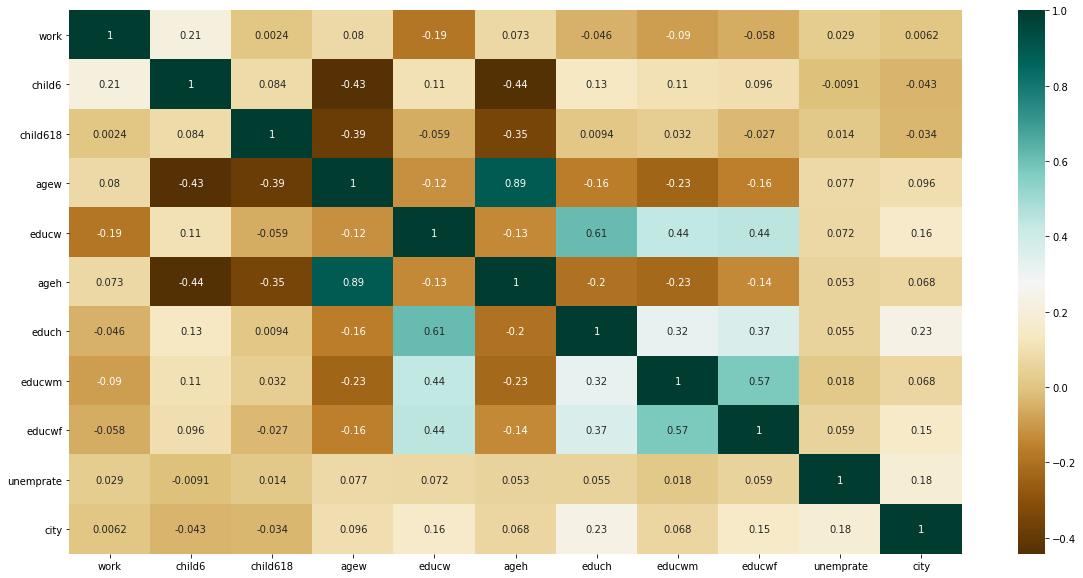

In [192]:
# Finding the relations between the variables

# Creating a copy of the dataframe:df so that we can replace the yes/no with 1/0
df_hm = df.copy()
to_binary(df_hm, 'work', 'yes', 'no') # user-defined function to replace string boolean columns with 1/0
to_binary(df_hm, 'city', 'yes', 'no') # user-defined function to replace string boolean columns with 1/0

# Plotting
plt.figure(figsize = (20,10))
c = df_hm.corr()
sns.heatmap(c, cmap = "BrBG", annot = True)

Observation: The heatmap quantifies one aspect of the pair plot (correlation)

Let us split the dataframe according to work and look at the correlation matrix

In [210]:
work_no, work_yes = col_split_bool(df_hm, "work", 0, 1) # User defined function that takes 1 dataframe and returns two dataframes split based on a boolean column

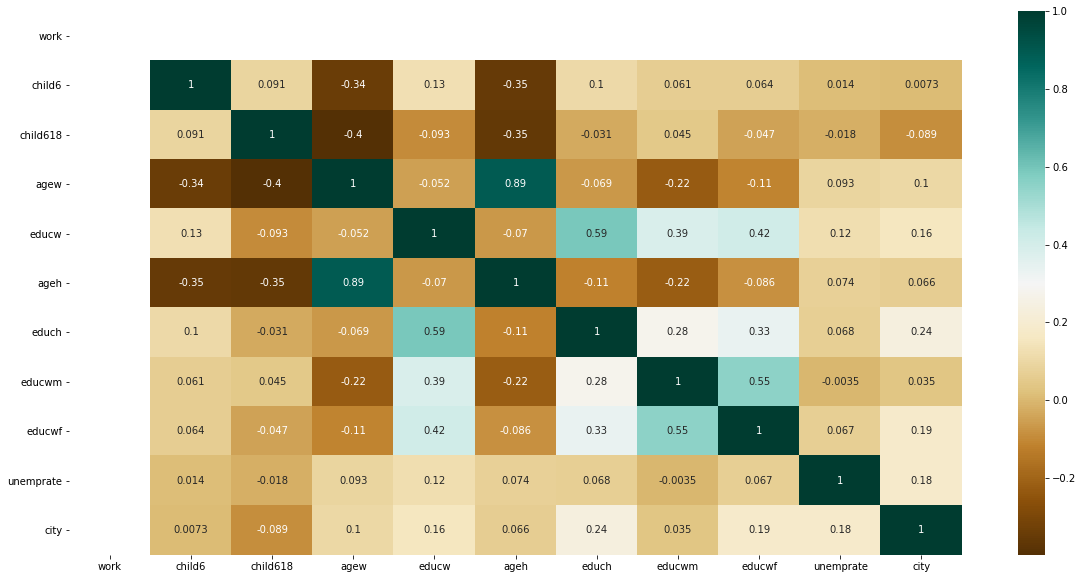

In [211]:
# Plotting
plt.figure(figsize = (20,10))
c = work_no.corr()
sns.heatmap(c, cmap = "BrBG", annot = True)

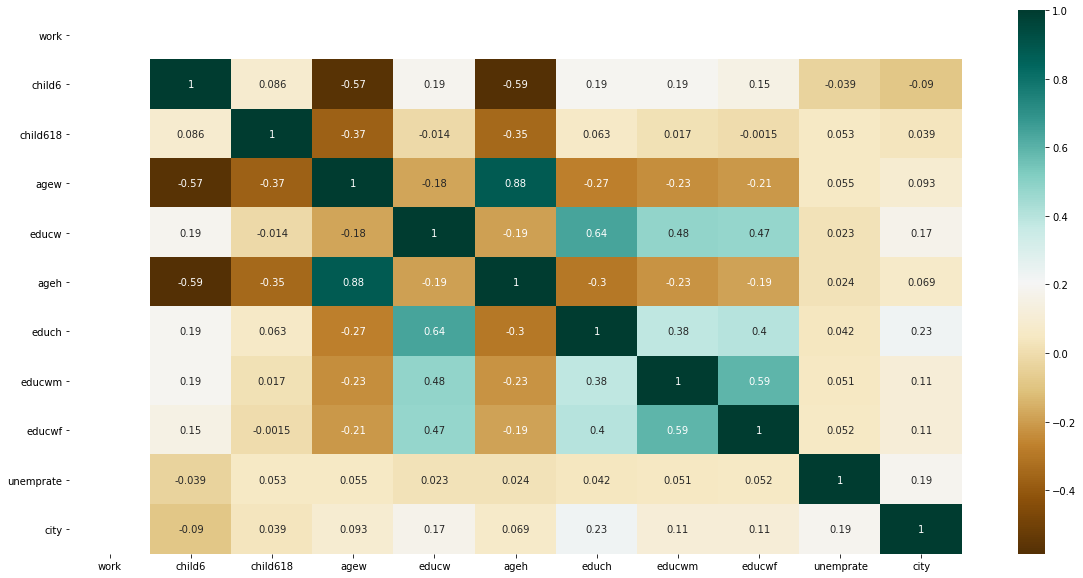

In [212]:
# Plotting
plt.figure(figsize = (20,10))
c = work_yes.corr()
sns.heatmap(c, cmap = "BrBG", annot = True)

### High school education vs work status

Women's education attainment: Atleast High School degree vs not (Assumption: 12 years of educational attainment means HS degree)

In [111]:
HS_yes_w, HS_no_w = col_split_cutoff(df,"educw", 12) # call the user defined function to split the data set (cutoff point = 12, and column = educw)

In [107]:
HS_yes_w["work"].value_counts(normalize = True) # with HS degree and more

False    0.600337
True     0.399663
Name: work, dtype: float64

In [108]:
HS_no_w["work"].value_counts(normalize = True) # without HS degree

True     0.55
False    0.45
Name: work, dtype: float64

Observation: Suprisingly, an individual is more likely to be out of work if the wife has atleast a Highschool degree (No work: 60% for HS+ vs 45% for no HS)

Repeat the same for column:educh (note: not the ideal way, can reduce the repetion using perhaps a function or loop)

In [ ]:
HS_yes_h, HS_no_h = col_split_cutoff(df,"educh", 12) # call the function to split the data set with 12 as the cutoff point & educw as the column

In [ ]:
HS_yes_h["work"].value_counts(normalize = True) # with HS degree and more

no     0.570642
yes    0.429358
Name: work, dtype: float64

In [ ]:
HS_no_h["work"].value_counts(normalize = True) # without HS degree

no     0.5625
yes    0.4375
Name: work, dtype: float64

Observation: Unlike education of wife, the education of husband does not have a strong difference between the two subgroups in terms of work/employment status


---






**PROPORTIONS TEST**

The two populations refer to the sub-group with and without a High School degree (at least).

1.   Null hypothesis: The proportions of wives working for the two populations are equal.

2.   Alternative hypothesis: The proportions of wives working for the two populations are different. (More specifically, the proportions of wives working is greater for those without HS degree)



Some Notations

1.  HS_yes_w = with High school degree, and 
2.   HS_no_w = without High school degree



HYPOTHESES

1.   Null         :  HS_yes_w = HS_no_w 
2.   Alternative  :  HS_no_w - HS_yes_w >0



In [ ]:
def to_binary (df, col, y, n):
  df[col] = df[col].replace(n,0)
  df[col] = df[col].replace(y,1)

In [109]:
# Using ttest_ind() from scipy.stats
stats.ttest_ind(HS_no_w["work"],HS_yes_w["work"]) # ttest_ind(a,b) | mean(a) - mean(b)

Ttest_indResult(statistic=3.4291310310557153, pvalue=0.0006385577136062028)



1.   t-statistic is positive
2.   p-value = 0.0006 (i.e. p-value < 0.001).

Hence, we can reject the null 
hypothesis 

# Hypothesis

## 1st hypothesis

1st Hypothesis:
individuals without work are more likely to not have a child under 6 (which is counterintuitive)
1.   Null:
2.   Alternative:






In [ ]:
# Seperating column:child6  based on columnwork
v1_no = df[df["work"]=="no"]["child6"]
v2_yes = df[df["work"] =="yes"]["child6"]

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [ ]:
# Conducting t-test using Scipy
# 2-tailed test for the null hypothesis that 2 independent samples have identical average(expected) values. This test assumes the populations have equal variance by default
stats.ttest_ind(v2_yes, v1_no) 


Ttest_indResult(statistic=nan, pvalue=nan)

We get a pvalue of 3.14* e-09, which is extremely small. It is smaller than alpha = 0.01. Hence, we can reject the null hypothesis. Note: to get pvalue for 1 tailed test(which is what we are interested in), divide the p-value by 2.

In [ ]:
cp = sns.countplot(x = "child6", data = df, hue = "work", palette= {"no": "red", "yes": "green"})
cp.set(xlabel="No. of children aged 6 and under")

Observation: If you look at the sub-group of individuals with child6 = 0, we see that a higher percentage of the sub-group is not working. However, once child6 > 0, it is more likely that the individual is working.

Perhaps, the confouding variable here could be age, younger individuals might be unemployed and have no kids. Let us explore that next

In [ ]:
df["work"].value_counts(normalize = True)

In [ ]:
plt.figure(figsize=(15,10))
cp = sns.countplot(x = "agew", data = df, hue = "work", palette= {"no": "red", "yes": "green"})
cp.set(xlabel="age of women", ylabel= "no of individuals (not/) working")

### H1:Logistic regression to test if age can predict unemployment

In [ ]:
#loading sklearn modules
from sklearn.model_selection import train_test_split
from sklearn import metrics # for confucion metrics
from sklearn.datasets import load_digits

In [ ]:
# assigning data, and target
target = np.array(df["work"])
#data = np.array(df["agew"]).reshape(-1,1)

data = df.drop(["work", "id", "city"], axis = 1).values

In [ ]:
# Splitting the data into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.25) #not assigning random state to be constant, because the model doesn't perform

In [ ]:
 from sklearn import preprocessing
X_scaled = preprocessing.scale(X_train)

In [ ]:
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))


[-2.59052039e-16 -1.05510557e-16  2.10036874e-16  3.42318766e-16
  2.58855191e-17 -7.89360697e-17  1.53738330e-16 -1.44486472e-16
  4.54719005e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# SkLearn 4 step modeling pattern
# 1. Import the model you want to use
# 2. Make an instance of the Model
# 3. Training the model on the data, storing the information learned from the data
# 4. Predict the labels of the new data (test data)


In [ ]:
#1.
from sklearn.linear_model import LogisticRegression

In [ ]:
#2.
logisticRegr = LogisticRegression()

In [ ]:
#3.
#logisticRegr.fit(X_train, y_train)
logisticRegr.fit(X_scaled, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#4.
# Returns a Numpy Array
# Predict for One Observation
logisticRegr.predict(X_test[0].reshape(1,-1))

array(['yes'], dtype=object)

In [ ]:
# Predict for multiple observations at once
logisticRegr.predict(X_test[0:10])

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes'], dtype=object)

In [ ]:
# Predict for the entire test data
predictions = logisticRegr.predict(X_test)

Measuring Model Performance

In [ ]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test,y_test)
print(score)

0.43915343915343913


In [ ]:
# Use confusion matrix (seaborn)
cm = metrics.confusion_matrix(y_test, predictions)

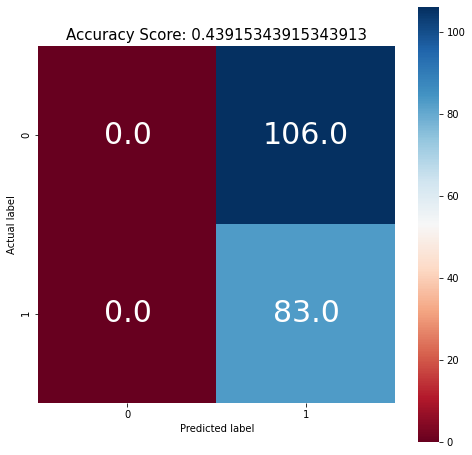

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True, annot_kws={"size": 30},fmt= '.1f', square = True, cmap = 'RdBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
sns.set(font_scale=2)

In [ ]:
df["work"].value_counts(normalize = True)

Conclusion: Age of wife is not a good predictor of employment status

## 2nd Hypothesis

High School education vs work status

In [ ]:
# Seperating column:child6  based on columnwork
v1_no = df[df["work"]=="no"]["child6"]
v2_yes = df[df["work"] =="yes"]["child6"]

In [ ]:
# Conducting t-test using Scipy
# 2-tailed test for the null hypothesis that 2 independent samples have identical average(expected) values. This test assumes the populations have equal variance by default
stats.ttest_ind(v2_yes, v1_no) 


In [ ]:
cp = sns.countplot(x = "child6", data = df, hue = "work", palette= {"no": "red", "yes": "green"})
cp.set(xlabel="No. of children aged 6 and under")

## 3rd Hypothesis

The age difference between husband and wife is higher for the sub-group that is not-working vs the sub-group that is working


1.   Null: age_diff_yeswork = age_diff_nowork
>  i.e. age_diff_nowork - age_diff_yeswork = 0
2.   Alternate: age_diff_nowork < age_diff_yeswork
>  i.e. age_diff_nowork - age_diff_yeswork > 0
